<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-import-and-preparation" data-toc-modified-id="Data-import-and-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data import and preparation</a></span><ul class="toc-item"><li><span><a href="#Adding-number-of-payments-feature" data-toc-modified-id="Adding-number-of-payments-feature-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Adding number of payments feature</a></span></li><li><span><a href="#Creating-features-matrix" data-toc-modified-id="Creating-features-matrix-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating features matrix</a></span></li><li><span><a href="#Standarizing-and-splitting-data" data-toc-modified-id="Standarizing-and-splitting-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Standarizing and splitting data</a></span></li><li><span><a href="#Investigating-Bayes-Unavoidable-Error" data-toc-modified-id="Investigating-Bayes-Unavoidable-Error-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Investigating Bayes Unavoidable Error</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Basic-model" data-toc-modified-id="Basic-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Basic model</a></span></li><li><span><a href="#Regression-with-Elasticnet-regularization" data-toc-modified-id="Regression-with-Elasticnet-regularization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Regression with Elasticnet regularization</a></span></li></ul></li><li><span><a href="#Random-Forest-Classifiers" data-toc-modified-id="Random-Forest-Classifiers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Random Forest Classifiers</a></span><ul class="toc-item"><li><span><a href="#Basic-Random-Forest" data-toc-modified-id="Basic-Random-Forest-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Basic Random Forest</a></span></li><li><span><a href="#Random-Forest-regularization" data-toc-modified-id="Random-Forest-regularization-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random Forest regularization</a></span></li></ul></li><li><span><a href="#Support-Vector-Machines" data-toc-modified-id="Support-Vector-Machines-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Support Vector Machines</a></span><ul class="toc-item"><li><span><a href="#SVC-initial-model" data-toc-modified-id="SVC-initial-model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>SVC initial model</a></span></li><li><span><a href="#SVM-hyperparameter-tuning" data-toc-modified-id="SVM-hyperparameter-tuning-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>SVM hyperparameter tuning</a></span></li></ul></li><li><span><a href="#Ensemble-Learning" data-toc-modified-id="Ensemble-Learning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ensemble Learning</a></span></li><li><span><a href="#Anomaly-Detection-algorithms" data-toc-modified-id="Anomaly-Detection-algorithms-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Anomaly Detection algorithms</a></span><ul class="toc-item"><li><span><a href="#Isolation-Forest" data-toc-modified-id="Isolation-Forest-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Isolation Forest</a></span></li><li><span><a href="#Anomaly-Detection-with-autoencoders" data-toc-modified-id="Anomaly-Detection-with-autoencoders-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Anomaly Detection with autoencoders</a></span></li></ul></li><li><span><a href="#Deep-Neural-Networks" data-toc-modified-id="Deep-Neural-Networks-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Deep Neural Networks</a></span></li></ul></div>

In [190]:
import pandas as pd
import numpy as np
import random as random

# plotly standard imports
import plotly.graph_objs as go
import chart_studio.plotly as py
from datetime import datetime
from datetime import timedelta  

In [191]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [192]:
import tensorflow as tf
from tensorflow import keras

In [193]:

# Cufflinks wrapper on plotly
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot
cufflinks.go_offline()

# Set global theme

import plotly.figure_factory as ff

In [194]:
from Custom_Functions import (append_split_class,
df_to_rnn_matrix,shuffle_arrays,sequences_train_test_split,precision_recall_threshold,
precision_recall_curve,model_comparison_outputs,prediction_df,plot_recall_surplus_train_test,plot_recall_surplus_train_test,binarize_labels,
plot_recall_vs_positives,plot_recall_surplus_regu_base,model_comparison_outputs_IF,model_comparison_outputs_Autoencoder)
        

In [195]:
def model_comparison_outputs_DNN(X_train, y_train, X_test, y_test, model):
    
    df_pred_train=prediction_df(X_train,y_train,model)
    df_pred_test=prediction_df(X_test,y_test,model)
    
    df_train_pr=precision_recall_curve(df_pred_train)
    df_test_pr=precision_recall_curve(df_pred_test)
    
    return df_pred_train,df_pred_test, df_train_pr, df_test_pr
    

# Data import and preparation

In [196]:
df=pd.read_excel("processed_data.xlsx")

In [197]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [198]:
df.columns

Index(['loan_ID', 'client_ID', 'sex', 'age', 'post_code', 'cash_payment',
       'initial_loan_value', 'installment_count', 'payout_date',
       'first_installment_date', 'installment', 'period', 'payment_value',
       'payment_date', 'cumulated_payments', 'expected_payment_date',
       'last_payment_period', 'last_payment_date', 'max_cumulated_payments',
       'payment_delay', 'month', 'payment_completeness', 'paid_ratio', 'year',
       'is_male', 'is_christmass_season', 'is_default', 'month_year',
       'date_bucket'],
      dtype='object')

## Adding number of payments feature

In [199]:
df_max_period=df.groupby("loan_ID")["period"].max().reset_index()
df_max_period.rename(columns={"period":'period_max'},inplace=True)

In [200]:
df=df.merge(df_max_period, on="loan_ID")

In [201]:
df.head()

,loan_ID,client_ID,sex,age,post_code,cash_payment,initial_loan_value,installment_count,payout_date,first_installment_date,...,month,payment_completeness,paid_ratio,year,is_male,is_christmass_season,is_default,month_year,date_bucket,period_max
0,20170626/13,7,Female,57,41-200,0,5872.32,24,2017-06-26,2017-07-20,...,7,1.000000,0.041667,2017,0,0,0,2017-07-01,2017-08-16 16:19:12,14
1,20170626/13,7,Female,57,41-200,0,5872.32,24,2017-06-26,2017-07-20,...,8,1.001308,0.083388,2017,0,0,0,2017-08-01,2017-09-16 08:38:24,14
2,20170626/13,7,Female,57,41-200,0,5872.32,24,2017-06-26,2017-07-20,...,9,1.001308,0.125109,2017,0,0,0,2017-09-01,2017-10-17 00:57:36,14
3,20170626/13,7,Female,57,41-200,0,5872.32,24,2017-06-26,2017-07-20,...,10,1.001308,0.166830,2017,0,0,0,2017-10-01,2017-11-16 17:16:48,14
4,20170626/13,7,Female,57,41-200,0,5872.32,24,2017-06-26,2017-07-20,...,11,1.001308,0.208551,2017,0,0,0,2017-11-01,2017-12-17 09:36:00,14


In [202]:
df.columns

Index(['loan_ID', 'client_ID', 'sex', 'age', 'post_code', 'cash_payment',
       'initial_loan_value', 'installment_count', 'payout_date',
       'first_installment_date', 'installment', 'period', 'payment_value',
       'payment_date', 'cumulated_payments', 'expected_payment_date',
       'last_payment_period', 'last_payment_date', 'max_cumulated_payments',
       'payment_delay', 'month', 'payment_completeness', 'paid_ratio', 'year',
       'is_male', 'is_christmass_season', 'is_default', 'month_year',
       'date_bucket', 'period_max'],
      dtype='object')

## Creating features matrix

In [203]:
groupby_features=['loan_ID','client_ID', 'is_male', 'age','cash_payment','installment_count','initial_loan_value']
ts_features=['payment_completeness','payment_delay']

In [204]:
min_payments=10
df_min_payments=df[df.period_max>=min_payments]
df_X=df[df.period<min_payments]
df_y=df[df.period==min_payments][["loan_ID","payment_completeness"]]
df_y.rename(columns={'payment_completeness':"y"},inplace=True)
df_X.reset_index(inplace=True)
df_y.reset_index(inplace=True)

In [205]:
col_list=groupby_features.copy()
for feature in ts_features:
    for i in range(1,min_payments):
   
        if i<10:
            col_name=feature+"_0"+str(i)
        else:
            col_name=feature+"_"+str(i)
        col_list.append(col_name)



In [206]:
df_pivot=df_X.pivot_table(index=groupby_features,columns="period",values=ts_features)
df_pivot.reset_index(inplace=True)
df_pivot.shape

(4307, 25)

In [207]:
len(col_list)

25

In [208]:

df_pivot=pd.DataFrame(df_pivot.values, columns=col_list)

In [209]:
df_pivot.head()

,loan_ID,client_ID,is_male,age,cash_payment,installment_count,initial_loan_value,payment_completeness_01,payment_completeness_02,payment_completeness_03,...,payment_completeness_09,payment_delay_01,payment_delay_02,payment_delay_03,payment_delay_04,payment_delay_05,payment_delay_06,payment_delay_07,payment_delay_08,payment_delay_09
0,20170626/13,7,0,57,0,24,5872.32,1,1.00131,1.00131,...,1.00131,-1,2,-2,0,-3,0,2,0,0
1,20170630/55,23,1,27,0,24,5872.32,1,1,1,...,1,2,1,4,-13,-23,-30,-33,-30,-27
2,20170630/62,34,0,61,0,24,3914.88,1.00539,1.00539,0.989517,...,1.01153,2,0,3,3,1,6,13,0,27
3,20170703/70,41,1,35,0,24,6851.28,1.00186,1.00536,0.980839,...,1.01587,2,11,1,-28,-30,-34,-35,-23,-10
4,20170703/81,44,0,69,0,24,4893.6,1,1,1,...,1,-6,-2,-2,-2,-11,0,-6,-3,3


In [210]:
df_input=df_pivot.merge(df_y[["loan_ID",'y']], on="loan_ID")

In [211]:
df_input.head()

,loan_ID,client_ID,is_male,age,cash_payment,installment_count,initial_loan_value,payment_completeness_01,payment_completeness_02,payment_completeness_03,...,payment_delay_01,payment_delay_02,payment_delay_03,payment_delay_04,payment_delay_05,payment_delay_06,payment_delay_07,payment_delay_08,payment_delay_09,y
0,20170626/13,7,0,57,0,24,5872.32,1,1.00131,1.00131,...,-1,2,-2,0,-3,0,2,0,0,1.001308
1,20170630/55,23,1,27,0,24,5872.32,1,1,1,...,2,1,4,-13,-23,-30,-33,-30,-27,1.000000
2,20170630/62,34,0,61,0,24,3914.88,1.00539,1.00539,0.989517,...,2,0,3,3,1,6,13,0,27,1.002881
3,20170703/70,41,1,35,0,24,6851.28,1.00186,1.00536,0.980839,...,2,11,1,-28,-30,-34,-35,-23,-10,1.050899
4,20170703/81,44,0,69,0,24,4893.6,1,1,1,...,-6,-2,-2,-2,-11,0,-6,-3,3,1.000000


In [212]:
features=df_input.columns[2:-1]
labels=df_input.columns[-1:]

In [213]:
features

Index(['is_male', 'age', 'cash_payment', 'installment_count',
       'initial_loan_value', 'payment_completeness_01',
       'payment_completeness_02', 'payment_completeness_03',
       'payment_completeness_04', 'payment_completeness_05',
       'payment_completeness_06', 'payment_completeness_07',
       'payment_completeness_08', 'payment_completeness_09',
       'payment_delay_01', 'payment_delay_02', 'payment_delay_03',
       'payment_delay_04', 'payment_delay_05', 'payment_delay_06',
       'payment_delay_07', 'payment_delay_08', 'payment_delay_09'],
      dtype='object')

In [214]:
X=df_input[features].values
y=df_input[labels].values

In [215]:
X.shape

(1631, 23)

In [216]:
y.shape

(1631, 1)

In [217]:
y=np.where(y>0.2,0,1)

In [218]:
y=y.ravel()

## Standarizing and splitting data

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [220]:
X=scaler.fit_transform(X)

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [222]:
y_train.mean()

0.12193251533742332

In [223]:
y_test.mean()

0.12538226299694188

## Investigating Bayes Unavoidable Error

In [224]:
payment_completeness_min=0.95
payment_delay_min=5
complete_payments_idx=(df_input.iloc[:,7:16]>=payment_completeness_min).sum(axis=1)==9
no_payment_delay_idx=(df_input.iloc[:,16:25]<=payment_delay_min).sum(axis=1)==9

In [225]:
no_risk_factors_idx=(no_payment_delay_idx*complete_payments_idx)
no_risk_factors_idx.sum()

E:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning:

evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead



662

In [226]:
y=np.where(df_input.iloc[:,-1:]>0.2,0,1)
y=y.ravel() 

In [227]:
y=np.where(df_input.iloc[:,-1:]>0.2,0,1)
y=y.ravel() 
#Maximum possible recall
1-(no_risk_factors_idx*y).sum()/y.sum()


0.835

# Logistic Regression

## Basic model

In [228]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(class_weight="balanced",max_iter=1000)

In [229]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [230]:
og_reg_pred_train,log_reg_pred_test,log_reg_pr_train,log_reg_pr_test= model_comparison_outputs(X_train,y_train, X_test, y_test, log_reg)

In [231]:
plot_recall_vs_positives(log_reg_pr_test)

In [232]:
plot_recall_surplus_train_test(log_reg_pr_train,log_reg_pr_test)

In [233]:
importance_df=pd.DataFrame(log_reg.coef_.ravel(),columns=["coefficients"])
importance_df["features"]=features
importance_df.sort_values(by="coefficients",inplace=True)

In [234]:

trace0=go.Bar(
        y=importance_df.coefficients,
        x=importance_df.features,
        
        marker=dict(
        color="blue",

        opacity=0.5
        ),
       
    )








data=[trace0]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Regression coefficients",
        yaxis=dict(title="coeff"),
        xaxis=dict(title="feature")

    
    ))
iplot(figure)

## Regression with Elasticnet regularization

In [235]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(class_weight="balanced",max_iter=1000,penalty="elasticnet",solver="saga",l1_ratio=0.3, C=0.007)


In [236]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.007, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=0.3,
                   max_iter=1000, multi_class='auto', n_jobs=None,
                   penalty='elasticnet', random_state=None, solver='saga',
                   tol=0.0001, verbose=0, warm_start=False)

In [237]:
log_reg_pred_train_1,log_reg_pred_test_1,log_reg_pr_train_1,log_reg_pr_test_1= model_comparison_outputs(X_train,y_train, X_test, y_test, log_reg)

In [238]:
plot_recall_surplus_train_test(log_reg_pr_train_1,log_reg_pr_test_1)

In [239]:
importance_df=pd.DataFrame(log_reg.coef_.ravel(),columns=["coefficients"])
importance_df["features"]=features
importance_df.sort_values(by="coefficients",inplace=True)
importance_df=importance_df[importance_df.coefficients!=0]

In [240]:

trace0=go.Bar(
        y=importance_df.coefficients,
        x=importance_df.features,
        
        marker=dict(
        color="blue",

        opacity=0.5
        ),
       
    )








data=[trace0]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Regression coefficients",
        yaxis=dict(title="coeff"),
        xaxis=dict(title="feature")

    
    ))
iplot(figure)

In [241]:
log_reg_pr_train.head()

,precission,recall,threshold,false_positive,true_positive,false_accusation_ratio,positives_share,search_multiplier
0,0.121933,1.0,0.00,1145,159,7.201258,1.0,1.0
1,0.121933,1.0,0.01,1145,159,7.201258,1.0,1.0
2,0.121933,1.0,0.02,1145,159,7.201258,1.0,1.0
3,0.121933,1.0,0.03,1145,159,7.201258,1.0,1.0
4,0.121933,1.0,0.04,1145,159,7.201258,1.0,1.0


In [242]:
plot_recall_surplus_regu_base(log_reg_pr_test,log_reg_pr_test_1)

# Random Forest Classifiers

## Basic Random Forest 

In [243]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=5, random_state=0,verbose=1,class_weight="balanced",min_samples_leaf=5,min_samples_split=5)
rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=1,
                       warm_start=False)

In [244]:
rf_clf_pred_train,rf_clf_pred_test,rf_clf_pr_train,rf_clf_pr_test= model_comparison_outputs(X_train,y_train, X_test, y_test, rf_clf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [245]:
plot_recall_vs_positives(rf_clf_pr_train)

In [246]:
plot_recall_surplus_train_test(rf_clf_pr_train,rf_clf_pr_test)

## Random Forest regularization

In [247]:

param_grid = [
   
    
    {"class_weight":["balanced"],"bootstrap":[True,False], "n_estimators":[50,100,200],"max_features":[2,3,4],"max_depth":[2,3,4],"min_samples_leaf":[20,40,60],"min_samples_split":[50,100,200]},
    
]

In [248]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

forest_cl=RandomForestClassifier (random_state=10,class_weight="balanced", n_jobs=4)

grid_search = GridSearchCV(forest_cl, param_grid, cv=5,
                          scoring="f1_weighted",return_train_score=True)

grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

In [ ]:
#rf_clf_best_params = grid_search.best_estimator_

In [249]:
rf_clf_best_params=RandomForestClassifier(bootstrap=True, class_weight='balanced',max_depth=2,max_features=4,
                min_samples_leaf=20,min_samples_split=50,n_estimators=50)


In [250]:
rf_clf_pred_train_1,rf_clf_pred_test_1,rf_clf_pr_train_1,rf_clf_pr_test_1= model_comparison_outputs(X_train,y_train, X_test, y_test, rf_clf_best_params)

In [251]:
plot_recall_surplus_train_test(rf_clf_pr_train_1,rf_clf_pr_test_1)

In [252]:
plot_recall_surplus_regu_base(rf_clf_pr_test,rf_clf_pr_test_1)

In [253]:
importance_df=pd.DataFrame(rf_clf_best_params.feature_importances_,columns=["coefficients"])
importance_df["features"]=features
importance_df.sort_values(by="coefficients",inplace=True)

In [254]:

trace0=go.Bar(
        x=importance_df.coefficients,
        y=importance_df.features,
        orientation="h",
        
        marker=dict(
        color="blue",

        opacity=0.5
        ),
       
    )








data=[trace0]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Feature importance",
        xaxis=dict(title="Importance"),
        yaxis=dict(title="Feature")

    
    ))
iplot(figure)

# Support Vector Machines

## SVC initial model

In [255]:
from sklearn.svm import SVC
SVC_clf = SVC(gamma="auto",class_weight="balanced",probability=True,kernel="rbf", C=0.1)
SVC_clf.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [256]:
SVC_clf_pred_train,SVC_clf_pred_test,SVC_clf_pr_train,SVC_clf_pr_test= model_comparison_outputs(X_train,y_train, X_test, y_test, SVC_clf)

In [257]:
plot_recall_surplus_train_test(SVC_clf_pr_train,SVC_clf_pr_test)

## SVM hyperparameter tuning

In [258]:

param_grid_SVM = [
#    {"class_weight":["balanced"],"probability":[True],'kernel':["poly"],"degree":[2,3,4], "coef0":[0.003,0.01,0.03,1],"C":[0.003,0.01,0.03]},
    
  {"gamma":[0.0003,0.001,0.002,0.003,0.01],"class_weight":["balanced"],"probability":[True],'kernel':["rbf"],"C":[0.8,1,1.2]},
    
]

In [259]:


grid_search_SVM = GridSearchCV(SVC_clf, param_grid_SVM, cv=5,
                          scoring="f1_weighted",return_train_score=True)

grid_search_SVM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=0.1, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.8, 1, 1.2], 'class_weight': ['balanced'],
                          'gamma': [0.0003, 0.001, 0.002, 0.003, 0.01],
                          'kernel': ['rbf'], 'probability': [True]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1_weighted', verbose=0)

In [260]:
grid_search_SVM.best_params_

{'C': 1,
 'class_weight': 'balanced',
 'gamma': 0.001,
 'kernel': 'rbf',
 'probability': True}

In [261]:
SVC_clf_best_params = grid_search_SVM.best_estimator_

In [262]:
y=SVC_clf_best_params.predict_proba(X_test)

In [263]:
SVC_clf_pred_train_1,SVC_clf_pred_test_1,SVC_clf_pr_train_1,SVC_clf_pr_test_1= model_comparison_outputs(X_train,y_train, X_test, y_test, SVC_clf_best_params)

In [264]:
plot_recall_surplus_train_test(SVC_clf_pr_train_1,SVC_clf_pr_test_1)

In [265]:
plot_recall_surplus_regu_base(SVC_clf_pr_test,SVC_clf_pr_test_1)

# Ensemble Learning

In [266]:
def mean_ensemble(X,y,model_list):
    proba_arr=np.ones([X.shape[0],len(model_list)])
    
    for i in range(0, len(model_list)):
        proba_arr[:,i]=model_list[i].predict_proba(X)[:,1]
        
    y_pred=proba_arr.mean(axis=1)
    
    df_pred=pd.DataFrame(y_pred,columns=["y_pred"])
    df_pred["y_true"]=pd.DataFrame(y) 
    df_pred["ones"]=1
    df_pred.sort_values(by="y_true", inplace=True)
    df_pred["true_rank"]=df_pred.ones.cumsum()
    df_pred.sort_values(by="y_pred", inplace=True)
    df_pred["pred_rank"]=df_pred.ones.cumsum()

    df_pred.drop(columns="ones",inplace=True)
    
    return(df_pred)
    

In [267]:
model_list=[rf_clf_best_params,log_reg,SVC_clf_best_params]

In [268]:
df_ensemble_train=mean_ensemble(X_train,y_train,model_list)
df_ensemble_test=mean_ensemble(X_test,y_test,model_list)

In [269]:
df_ensemble_train_pr=precision_recall_curve(df_ensemble_train)
df_ensemble_test_pr=precision_recall_curve(df_ensemble_test)


In [270]:
plot_recall_surplus_train_test(df_ensemble_train_pr,df_ensemble_test_pr)

In [271]:
    trace0=go.Scatter(
            y=log_reg_pr_test.recall-log_reg_pr_test.positives_share,
            x=log_reg_pr_test.positives_share,
            mode='lines',
            marker=dict(
            color="blue",
            size=5,
            opacity=0.5
            ),
            name="Logistic regression"
        )

    trace1=go.Scatter(
            y=rf_clf_pr_test_1.recall-rf_clf_pr_test_1.positives_share,
            x=rf_clf_pr_test_1.positives_share,
            mode='lines',
            marker=dict(
            color="green",
            size=5,
            opacity=0.5
            ),
            name="Random Forest"
        )

    trace2=go.Scatter(
            y=SVC_clf_pr_test_1.recall-SVC_clf_pr_test_1.positives_share,
            x=SVC_clf_pr_test_1.positives_share,
            mode='lines',
            marker=dict(
            color="red",
            size=5,
            opacity=0.5
            ),
            name="SVM"
        )


    trace3=go.Scatter(
            y=df_ensemble_test_pr.recall-df_ensemble_test_pr.positives_share,
            x=df_ensemble_test_pr.positives_share,
            mode='lines',
            marker=dict(
            color="orange",
            size=10,
            opacity=0.5
            ),
            name="Ensemble Model"
        )

    



    data=[trace0, trace1,trace2,trace3]
    figure=go.Figure(
        data=data,
        layout=go.Layout(
            title="Wykryte defaulty vs zakres screeningu",
            yaxis=dict(title="Nadwyżka Pełności"),
            xaxis=dict(title="Odsetek Pozytywnych",range=[0,0.4]),
            legend=dict(
                x=0.77,
                y=0,
                traceorder="normal",
                font=dict(
                    family="sans-serif",
                    size=12,
                    color="black"
                ),
            bgcolor=None


        )))
    iplot(figure)

# Anomaly Detection algorithms

## Isolation Forest

In [272]:
from sklearn.ensemble import IsolationForest
Isolation_Forest=IsolationForest(n_estimators=100,max_samples="auto",random_state=40,bootstrap=True,
                         contamination=y_train.mean(),max_features=4)


In [273]:
Isolation_Forest.fit(X_train)

IsolationForest(behaviour='deprecated', bootstrap=True,
                contamination=0.12193251533742332, max_features=4,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=40, verbose=0, warm_start=False)

In [274]:
IF_pred_train,IF_pred_test,IF_pr_train,IF_pr_test= model_comparison_outputs_IF(X_train,y_train, X_test, y_test, Isolation_Forest)

In [275]:
plot_recall_surplus_train_test(IF_pr_train,IF_pr_test)

## Anomaly Detection with autoencoders

In [276]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

In [277]:
input_dim=int(X.shape[1])
encoding_dim=int(input_dim/3)
hidden_dim=int(encoding_dim/3)
n_epochs=100


In [278]:
hidden_dim

2

In [279]:

model=keras.models.Sequential([

    keras.layers.Dense(input_shape=[input_dim ],units=encoding_dim, activation='tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=hidden_dim, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=encoding_dim, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=input_dim, activation='tanh'),



])

In [280]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 7)                 168       
_________________________________________________________________
dropout_2 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 16        
_________________________________________________________________
dropout_3 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 21        
_________________________________________________________________
dropout_4 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 23)               

In [281]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

In [282]:
X_test.shape

(327, 23)

In [283]:
X_train.shape

(1304, 23)

In [284]:

history = model.fit(X_train, X_train,
                    epochs=n_epochs,
                    batch_size=50,
                    validation_data=(X_test, X_test),
                    verbose=1)

Train on 1304 samples, validate on 327 samples
Epoch 1/100
1304/1304 [==============================] - 1s 885us/sample - loss: 1.0566 - accuracy: 0.0368 - val_loss: 0.8752 - val_accuracy: 0.0306
Epoch 2/100
1304/1304 [==============================] - 0s 100us/sample - loss: 1.0441 - accuracy: 0.0322 - val_loss: 0.8727 - val_accuracy: 0.0428
Epoch 3/100
1304/1304 [==============================] - 0s 120us/sample - loss: 1.0396 - accuracy: 0.0261 - val_loss: 0.8721 - val_accuracy: 0.0459
Epoch 4/100
1304/1304 [==============================] - 0s 141us/sample - loss: 1.0360 - accuracy: 0.0238 - val_loss: 0.8720 - val_accuracy: 0.0428
Epoch 5/100
1304/1304 [==============================] - 0s 131us/sample - loss: 1.0338 - accuracy: 0.0261 - val_loss: 0.8723 - val_accuracy: 0.0520
Epoch 6/100
1304/1304 [==============================] - 0s 123us/sample - loss: 1.0304 - accuracy: 0.0376 - val_loss: 0.8723 - val_accuracy: 0.0459
Epoch 7/100
1304/1304 [==============================] - 0s

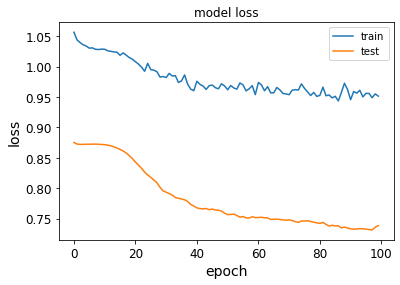

In [285]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

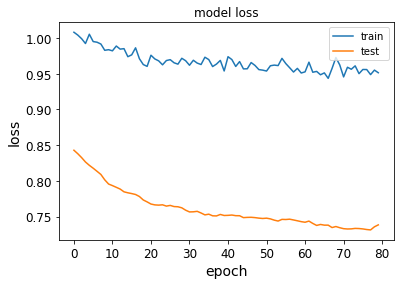

In [286]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [287]:
AC_pred_train,AC_pred_test,AC_pr_train,AC_pr_test= model_comparison_outputs_Autoencoder(X_train,y_train, X_test, y_test, model)

In [288]:
plot_recall_surplus_train_test(AC_pr_train,AC_pr_test)


# Deep Neural Networks

In [289]:
tf.keras.backend.clear_session()
tf.random.set_seed(60)

DNN=keras.models.Sequential([
    keras.layers.Dense(input_shape=[input_dim ],units=40, activation='tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=20, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='relu'),
    keras.layers.Dense(units=1, activation="sigmoid"),



])

In [290]:
DNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                960       
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
______________________________________________________

In [291]:
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch:0.001*(epoch /10))

In [292]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="mse", optimizer=optimizer)

In [293]:
optimizer = keras.optimizers.Adam(lr=0.0004)
DNN.compile(optimizer=optimizer, 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

In [294]:

history = DNN.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    verbose=1)

Train on 1304 samples, validate on 327 samples
Epoch 1/100
1304/1304 [==============================] - 1s 570us/sample - loss: 0.2461 - accuracy: 0.5629 - val_loss: 0.2197 - val_accuracy: 0.7003
Epoch 2/100
1304/1304 [==============================] - 0s 180us/sample - loss: 0.2066 - accuracy: 0.7071 - val_loss: 0.1862 - val_accuracy: 0.8257
Epoch 3/100
1304/1304 [==============================] - 0s 217us/sample - loss: 0.1742 - accuracy: 0.7860 - val_loss: 0.1626 - val_accuracy: 0.8532
Epoch 4/100
1304/1304 [==============================] - 0s 147us/sample - loss: 0.1576 - accuracy: 0.8336 - val_loss: 0.1469 - val_accuracy: 0.8685
Epoch 5/100
1304/1304 [==============================] - 0s 148us/sample - loss: 0.1483 - accuracy: 0.8551 - val_loss: 0.1346 - val_accuracy: 0.8716
Epoch 6/100
1304/1304 [==============================] - 0s 166us/sample - loss: 0.1338 - accuracy: 0.8704 - val_loss: 0.1263 - val_accuracy: 0.8746
Epoch 7/100
1304/1304 [==============================] - 0s

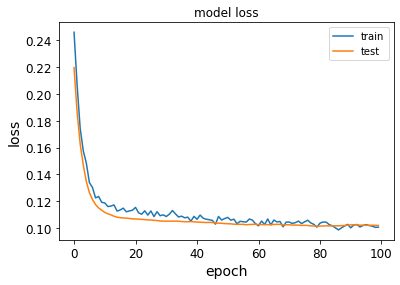

In [295]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

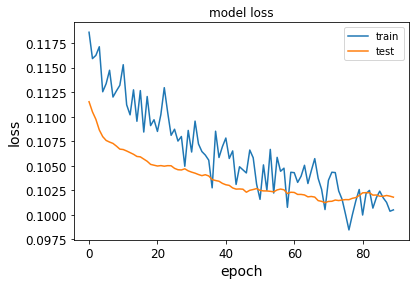

In [296]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'][10:])
plt.plot(history.history['val_loss'][10:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [297]:
DNN_pred_train,DNN_pred_test,DNN_pr_train,DNN_pr_test= model_comparison_outputs_DNN(X_train,y_train, X_test, y_test, DNN)

In [298]:
plot_recall_surplus_train_test(DNN_pr_train,DNN_pr_test)

In [299]:

    trace1=go.Scatter(
            y=rf_clf_pr_test_1.recall-rf_clf_pr_test_1.positives_share,
            x=rf_clf_pr_test_1.positives_share,
            mode='lines',
            marker=dict(
            color="green",
            size=5,
            opacity=0.5
            ),
            name="Random Forest"
        )

    trace2=go.Scatter(
            y=DNN_pr_test.recall-DNN_pr_test.positives_share,
            x=DNN_pr_test.positives_share,
            mode='lines',
            marker=dict(
            color="blue",
            size=5,
            opacity=0.5
            ),
            name="DNN"
        )


    trace3=go.Scatter(
            y=df_ensemble_test_pr.recall-df_ensemble_test_pr.positives_share,
            x=df_ensemble_test_pr.positives_share,
            mode='lines',
            marker=dict(
            color="orange",
            size=10,
            opacity=0.5
            ),
            name="Ensemble Model"
        )

    



    data=[trace1,trace2,trace3]
    figure=go.Figure(
        data=data,
        layout=go.Layout(
            title="Recall surplus in relation to decision boundary",
            yaxis=dict(title="Recall surplus"),
            xaxis=dict(title="Positives share",range=[0,0.4]),
            legend=dict(
                x=0.77,
                y=0,
                traceorder="normal",
                font=dict(
                    family="sans-serif",
                    size=12,
                    color="black"
                ),
            bgcolor=None


        )))
    iplot(figure)

In [300]:
rf_clf_pr_test_1.to_excel("Random_Forest_summary.xlsx")

In [301]:
df_ensemble_test_pr.to_excel("Ensemble_summary.xlsx")

In [302]:
DNN_pr_test.to_excel("DNN_summary.xlsx")